# INF 510_Fall 2019_Final Project 

1.	**The names of team member(s)**:

    Yue Hao.

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**
    
    This project requires the following packages:
    - pandas, numpy, seaborn, folium ,matplotlib
    
    To make sure that all the graphs will be created successfully, user should check whether these packages have been installed or not. If not, these seaborn and folium packages should be downloaded and installed in advance. There are several ways to do it.In conda prompt, using commend: ***conda create -f environment.yml*** to create a new conda environment. If it fails, using the commend: ***conda install seaborn*** and ***conda install -c conda-forge folium*** to install two packages. Or, in the terminal, using commend: ***pip install seaborn*** and ***pip install folium***.
    To run this project, make sure the above packages are installed, and then simply clone the repo at http://www.github.com/YueHao96/inf510_project and execute this notebook.
    
    As to final results, if you want to run the python files, there are two offered parameters.
    - In terminal, run the commend: ***python result.py relation***, after few minutes, four graphs will be created and shown. However, these four graphs will not present together. After running the code, one graph show in a pop up window After closing the current window, the next graph will show up. The first graph is a correlation matrix, and the next three graphs are scatter diagrams in four dimensions.
    - If commend: ***python result.py distribution*** is used, one map will be presented on the browser and to .html files will be saved under the current path. This map show the distribution of 50 house locations with highest housing values and 50 house locations with lowest housing values in Los Angeles County. On the webpage, this map is interactive. It means that viewer can zoom in or out the map to explore the location of each house.Also, if click on the icon, specific hosing value will pop up.
    
    As to data scraping and data modeling, there are also two available commends.
    - Run the commend ***python main.py remote*** to scrape data and store data into databases.
    - Run the commend ***python main.py local*** to load data from local csv files and store the data into databases.

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
   - Firstly, collected data are not adequate enough. Data collection and organization are based on zip codes. Zip codes in Los Angeles County ranges from 90001 to 93599. If available, more than 3000 records for each data set are expected. However, based on zip code and city name, Zillow API is constructed but clean data obtained from requests are only around 250 records. Compared with 3000 expected results, the data volume is not satisfying. It may be explained by the restriction of the website. However, there may be better resources for data collection. Also,a these data can not represent an average level or be generalized because one or two housing values can not present a phenomenon in community level.
   - Secondly, scraping crime rates in Los Angeles County by zip code takes about 2 hours because the website does not provide API.To reduce waiting time, it is better to get data from csv file directly.
   - Lastly, if city boundaries are drown on the distribution map, it may be easier to view and analysis spatial patterns in city level. 

4.  **Anything else you feel is relevant to the grading of your project your project.**
   
    When running the python files, after closing the current graph, next grap will pop up.The last graph (Graph 6) will not show in the juypter notebook directly but in the browser.
    

5.  **What did you set out to study?**
    
    Major goal of this study is to find out correlations between housing values, surrounding environment and personal income status in Los Angeles County. Also, it aims at finding out specific patterns on spatial distribution of highest and lowest housing values in Los Angeles County.

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    Based on Milestone1, there are three major findings.
    - Firstly, there is a strong positive correlation between household median income and housing value.It is somehow confirmed with the assumption in milestone1 that in areas where housing values are high, the household median income level is also high.
    - Secondly, most houses with high values are grouped at southwestern part of LA county and a large part of them are located along the coastline while houses with low values are clustered at southestern part except few houses located at the north.
    - Thirdly, there is no clear pattern between walk score and housing value.Because the correlation coefficient between walk score and housing value is 0.13 which is too small to be counted.

   Except for the supposed ones in Milestone1, there are more outcomes. 
    - On one hand, there are strong correlations between household median income level and other factors: housing values, population density and violent crime rate. In areas where household median income is less than 60,000 USD , and the housing value is less than 1000,000 USD, population density is very high and violent crime rate is usually grater than 50%.For reference, the US average is 22.7%.Generally speaking, with the increase of income level and housing value, violent crime rate is decreasing but this phenomenon can not be applied to population density. 
    - On the other hand, though less significant, correlations between population density, walk score, violent crime rate and income level are also worth analyzing. In areas where population density are high, walk scores and violent crime rates are also high and vise versa.However,income level is higher in areas where population density is low.

7. **What difficulties did you have in completing the project?**

    According to Walk Score API documentation, latitudes and longitudes are required. Thus, collecting coordinates are required. Zillow API is then used.However, response from the data request is not neat and different from the format that we usually see. It takes me some time to figure out how to make a wise loop to find needed data as well as reduce repeat of code. 
    
    Also, since there are five factors involved, presenting these five variables in one graph is somehow impractical. I have tried several methods like a 3D scatter diagram but the final result is very messy. To avoid a messy situation, I decide to check the relevancy between different factors and then analyze the most relevant ones.

8. **What skills did you wish you had while you were doing the project?**
    
    Based on the current model, I think it will be better if a front-end interactive portal can be designed and implemented. To be more specific, this portal is used for users to search housing value and violent crime rate based on zip code or community name. Also, based on user’s income level, the system will return the information about his or her affordable houses. Skills like how to build a client server in Pyhon3 is needed.
    
    Besides, I also want to learn skills like how to design and construct a project in a more organized and efficient way.For instance, I do not know how to build classes and objects in a wise way.This skill can shorten my code lines and make it more efficient for reuse.Also, I want to know more skills about how to clean data in a wise way. 

9. **What would you do “next” to expand or augment the project?**
    
    To expand the project, more data are definitely needed.In the next step, I will check more websites that offer APIs with more accessible data. Also, when talking about site-choosing, more environmental factors are also of high relevance like are there any hospitals, schools, parks or food outlets around. In addition, algorithm can be applied to calculate different factors int one index to suggest the living environment condition.

In [101]:
import os
import sys
sys.path.insert(0, os.path.abspath('../src'))

import correlation
import distribution
import income_relation
import density_relation

## Graph1: Correlation Matrix

In [110]:
correlation.run_correlation_matrix()

Since I want to find out the relation between income, housing value and environmental factors, scatter diagram is a perfect choice. However, there are five variables involved: housing value, median household income, walk score, population density and crime rate. We may loose the point and focus if these five factors are going to be plotted on a same graph.Thus, I decided to figure out how relevant these factors are.

Correlation matrix is used to show correlation coefficients between variables. Each cell in the graph shows the correlation between two variables.Higher the absolute value is, higher the correlation is.
From the values and colors we can tell that there are strong correlations between household median income level and another three factors: housing values, population density and crime rate. Though weaker, correlations between population density, walk score, crime rate and income level also exist.
It is confirmed with the conjestion in milestone1 that there is a positive correlation between household median income and housing value. However, the correlation coefficient between walk score and housing value is 0.13 which is too small to be counted. Thus, the conclusion is, there is no clear pattern between these two factors.
    

## Graph2-5: Scatter Diagrams

In [109]:
sql='SELECT value,income,density,crime_rate \
         FROM Value Join Crime_rate Join Urban join Income on \
         Value.zipcode_id=Crime_rate.zipcode_id \
         and Value.zipcode_id=Urban.zipcode_id and \
         Value.zipcode_id=Income.zipcode_id\
         where value!=-1'
cm="Reds"
name="All data"
income_relation.income_relation(sql,cm,name)

Graph2:Larger the point is,higher the populaiton density is.In areas where household median income is less than 60000 USD and the housing value is less than 1,000,000 USD, population density is very high and crime rate is usually grater than 50%.Generally speaking, with the increase of income level and housing value, crime rate is in decrease but this phenomenon can not be applied to populaiton density.

FileNotFoundError: [Errno 2] No such file or directory: 'lowest_20.png'

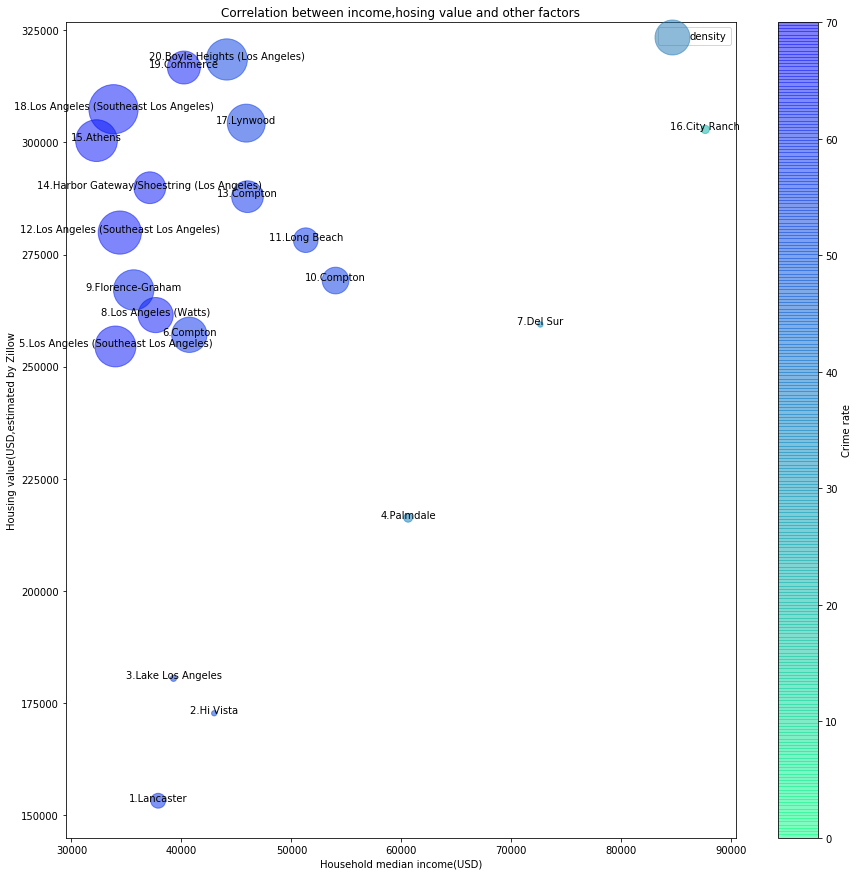

In [104]:
sql='SELECT value,income,density,crime_rate FROM \
         Income join Value Join Crime_rate Join Urban on \
         Income.zipcode_id=Value.zipcode_id and \
         Value.zipcode_id=Crime_rate.zipcode_id and \
         Value.zipcode_id=Urban.zipcode_id \
         where value!=-1 and crime_rate!=-1 ORDER BY value ASC limit 20'
cm="winter_r"
name="lowest_20"
income_relation.income_relation(sql,cm,name)

Graph3:The graph shows the 20 lowest housing values in Los Angeles County.Community name is labeled on each point.There is no clear pattern between the income level and housing values. From the top left part of the corner we can tell that, though the income level is low, housing values are relatively high. However,in these 20 areas, crime rates and population density are both very high.

In [108]:
sql='SELECT value,income,density,crime_rate FROM \
         Income join Value Join Crime_rate Join Urban on \
         Income.zipcode_id=Value.zipcode_id and \
         Value.zipcode_id=Crime_rate.zipcode_id and \
         Value.zipcode_id=Urban.zipcode_id \
         where value!=-1 and crime_rate!=-1 ORDER BY value DESC limit 20'
cm="autumn_r"
name="higest_20"
income_relation.income_relation(sql,cm,name)

Graph4:Compared with graph4, pattern of the 20 highest housing values is clearer.Generally speaking, with the increase of income level, hosuing values are also increasing.Crime rates are lower than 30% at most places. However, population density in some areas are also high.The gap betweent the most expensive house and the 20th most expensive house is about $3,000,000, which is very surprising.

In [107]:
density_relation.run_density_relation()

Graph5:Shape of each point represents household median income level.In areas where population density are high, walk scores and crime rates are also high and vise versa.However,income level is higher in areas where population density is low.

## Graph6:Distribution Map

In [9]:
distribution.run_distribution()

Shown map in the browser is interactive, you can zoom in or zoom out the map as you wish. You can click each icon to check the housing value at each marked location.

On this map, red icons and blue icons mark 50 house locations with highest and lowest housing values in Los Angeles County respectively.
Spatial distribution of these houeses are interesting.Most houses with high values are grouped at southwestern part of LA county and a large part of them are along the coastline while houses with low values are clustered at southestern part except few houses located at the north.